# Car Prices

🎯 This exercise consists of the data preparation and feature selection techniques you have learnt today using a new dataset.

👇 Download the `ML_Cars_dataset.csv` [here](https://wagon-public-datasets.s3.amazonaws.com/Machine%20Learning%20Datasets/ML_Cars_dataset.csv) and place it in the `data` folder. Load the data as a pandas dataframe named `df`, and display its first 5 rows.

In [1]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_csv("data/ML_Cars_dataset.csv")
df.head()

,aspiration,enginelocation,carwidth,curbweight,enginetype,cylindernumber,stroke,peakrpm,price
0,std,front,64.1,2548,dohc,four,2.68,5000,expensive
1,std,front,64.1,2548,dohc,four,2.68,5000,expensive
2,std,front,65.5,2823,ohcv,six,3.47,5000,expensive
3,std,front,NaN,2337,ohc,four,3.40,5500,expensive
4,std,front,66.4,2824,ohc,five,3.40,5500,expensive


ℹ️ The description of the dataset is available [here](https://wagon-public-datasets.s3.amazonaws.com/Machine%20Learning%20Datasets/ML_Cars_dataset_description.txt). Make sure to refer to it throughout the exercise.

# 1 - Duplicates

👇 Remove the duplicates from the dataset if there are any. Overwite the dataframe `df`.

In [3]:
df.drop_duplicates(inplace=True)
df.head(3)

,aspiration,enginelocation,carwidth,curbweight,enginetype,cylindernumber,stroke,peakrpm,price
0,std,front,64.1,2548,dohc,four,2.68,5000,expensive
2,std,front,65.5,2823,ohcv,six,3.47,5000,expensive
3,std,front,NaN,2337,ohc,four,3.40,5500,expensive


# 2 - Missing values

👇 Locate missing values, investigate them, and apply the solutions below accordingly:

- Impute with most frequent
- Impute with median

Make your changes to the dataframe `df`.

In [4]:
df.isnull().sum()

aspiration         0
enginelocation    10
carwidth           2
curbweight         0
enginetype         0
cylindernumber     0
stroke             0
peakrpm            0
price              0
dtype: int64

## `carwidth`

<details>
    <summary> 💡 Hint </summary>
    <br>
    ℹ️ <code>carwidth</code> has multiple representations for missing values. Some are <code>np.nans</code>, some are  <code>*</code>. Once located, they can be imputed by the median value, since missing values make up less than 30% of the data.
</details> 

In [5]:
df.carwidth.replace("*", "nan", inplace=True)
df.carwidth.replace("", "nan", inplace=True)

In [6]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")
imputer.fit(df[["carwidth"]])
df["carwidth"] = imputer.transform(df[["carwidth"]])


## `enginelocation`

<details>
    <summary>💡 Hint </summary>
    <br>
    ℹ️ Considering that <code>enginelocation</code> is a categorical feature, and that the vast majority of the category is <code>front</code>, impute with the most frequent.
</details>

In [7]:
df.enginelocation.unique()
df = df. fillna(df['enginelocation'].value_counts().index[0])
df.enginelocation.unique()

array(['front', 'rear'], dtype=object)

### ☑️ Test your code

In [8]:
from nbresult import ChallengeResult

result = ChallengeResult('missing_values',
                         dataset = df)
result.write()
print(result.check())

============================= test session starts ==============================
platform linux -- Python 3.8.12, pytest-6.2.5, py-1.11.0, pluggy-1.0.0 -- /home/cherif/.pyenv/versions/lewagon/bin/python3
cachedir: .pytest_cache
rootdir: /home/cherif/code/cherifbenham/data-challenges/05-ML/02-Prepare-the-dataset/03-Car-Prices
plugins: anyio-3.4.0
collecting ... collected 2 items

tests/test_missing_values.py::TestMissing_values::test_carwidth PASSED   [ 50%]
tests/test_missing_values.py::TestMissing_values::test_engine_location PASSED [100%]

============================== 2 passed in 0.41s ===============================


💯 You can commit your code:

git add tests/missing_values.pickle

git commit -m 'Completed missing_values step'

git push origin master


# 3 - Scaling

👇 Investigate the numerical features for outliers and distribution, and apply the solutions below accordingly:
- Robust Scale
- Standard Scale

Replace the original columns with the transformed values.

## `peakrpm` , `carwidth` , & `stroke`

<details>
    <summary>💡 Hint </summary>
    <br>
    ℹ️ <code>peakrpm</code>, <code>carwidth</code>, & <code>stroke</code> have normal distributions and outliers. They must be Robust Scaled.
</details>

In [9]:
scaler = RobustScaler()
scaler.fit(df[["peakrpm"]])
df.peakrpm = scaler.transform(df[["peakrpm"]])

scaler = RobustScaler()
scaler.fit(df[["carwidth"]])
df.carwidth = scaler.transform(df[["carwidth"]])

scaler = RobustScaler()
scaler.fit(df[["stroke"]])
df.stroke = scaler.transform(df[["stroke"]])

## `curbweight`

<details>
    <summary>💡 Hint </summary>
    <br>
    ℹ️ <code>curbweight</code> has a normal distribution and no outliers. It can be Standard Scaled.
</details>

In [10]:
scaler = StandardScaler()
scaler.fit(df[["curbweight"]])
df.curbweight = scaler.transform(df[["curbweight"]])

### ☑️ Test your code

In [11]:
df.head(20)

,aspiration,enginelocation,carwidth,curbweight,enginetype,cylindernumber,stroke,peakrpm,price
0,std,front,-0.518519,-0.048068,dohc,four,-2.033333,-0.142857,expensive
2,std,front,0.000000,0.476395,ohcv,six,0.600000,-0.142857,expensive
3,std,front,0.000000,-0.450474,ohc,four,0.366667,0.571429,expensive
4,std,front,0.333333,0.478302,ohc,five,0.366667,0.571429,expensive
5,std,front,0.296296,-0.126260,ohc,five,0.366667,0.571429,expensive
6,std,front,2.185185,0.516445,ohc,five,0.366667,0.571429,expensive
7,std,front,0.000000,0.726230,ohc,five,0.366667,0.571429,expensive
8,turbo,front,2.185185,0.977972,ohc,five,0.366667,0.571429,expensive
9,turbo,front,0.888889,0.915036,ohc,five,0.366667,0.571429,expensive
10,std,front,-0.259259,-0.339860,ohc,four,-1.633333,1.000000,expensive


In [12]:
from nbresult import ChallengeResult

result = ChallengeResult('scaling',
                         dataset = df
)

result.write()
print(result.check())

============================= test session starts ==============================
platform linux -- Python 3.8.12, pytest-6.2.5, py-1.11.0, pluggy-1.0.0 -- /home/cherif/.pyenv/versions/lewagon/bin/python3
cachedir: .pytest_cache
rootdir: /home/cherif/code/cherifbenham/data-challenges/05-ML/02-Prepare-the-dataset/03-Car-Prices
plugins: anyio-3.4.0
collecting ... collected 4 items

tests/test_scaling.py::TestScaling::test_carwidth PASSED                 [ 25%]
tests/test_scaling.py::TestScaling::test_curbweight PASSED               [ 50%]
tests/test_scaling.py::TestScaling::test_peakrpm PASSED                  [ 75%]
tests/test_scaling.py::TestScaling::test_stroke PASSED                   [100%]

============================== 4 passed in 0.40s ===============================


💯 You can commit your code:

git add tests/scaling.pickle

git commit -m 'Completed scaling step'

git push origin master


# 4 - Encoding

👇 Investigate the features that require encoding, and apply the following techniques accordingly:

- One hot encoding
- Manual ordinal encoding

In the dataframe, replace the original features with their encoded version(s).

## `aspiration` & `enginelocation`

<details>
    <summary>💡 Hint </summary>
    <br>
    ℹ️ <code>aspiration</code> and <code>enginelocation</code> are binary categorical features.
</details>

In [13]:
df.aspiration.unique()
#requires one hot encoding

array(['std', 'turbo'], dtype=object)

In [14]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(drop='if_binary', sparse = False) # Instantiate encoder for binary feature
ohe.fit(df[['aspiration']]) # Fit encoder
df['aspiration'] = ohe.transform(df[['aspiration']]) # Encode 

ohe = OneHotEncoder(drop='if_binary', sparse = False) # Instantiate encoder for binary feature
ohe.fit(df[['enginelocation']]) # Fit encoder
df['enginelocation'] = ohe.transform(df[['enginelocation']]) 


## `enginetype`

<details>
    <summary>💡 Hint </summary>
    <br>
    ℹ️ <code>enginetype</code> is a multicategorical feature and must be One hot encoded.
</details>

In [15]:
df.enginetype.unique()

array(['dohc', 'ohcv', 'ohc', 'l', 'rotor', 'ohcf', 'dohcv'], dtype=object)

In [28]:
ohe = OneHotEncoder(sparse = False) # Instantiate encoder

ohe.fit(df[['enginetype']]) # Fit encoder

encoded = ohe.transform(df[['enginetype']]) # Encode

df["dohc"],df["ohcv"],df['ohc'], df['l'], df['rotor'], df['ohcf'], df['dohcv'] = encoded.T

encoded

KeyError: "None of [Index(['enginetype'], dtype='object')] are in the [columns]"

## `cylindernumber`

<details>
    <summary>💡 Hint </summary>
    <br>
    ℹ️ <code>cylindernumber</code> is an ordinal feature and must be manually encoded.
</details>

In [17]:
df.cylindernumber.replace("four", 4, inplace=True)
df.cylindernumber.replace("six", 6, inplace=True)
df.cylindernumber.replace("five", 5, inplace=True)
df.cylindernumber.replace("three", 3, inplace=True)
df.cylindernumber.replace("twelve", 12, inplace=True)
df.cylindernumber.replace("two", 2, inplace=True)
df.cylindernumber.replace("eight", 8, inplace=True)

df.head()

,aspiration,enginelocation,carwidth,curbweight,enginetype,cylindernumber,stroke,peakrpm,price,dohc,ohcv,ohc,l,rotor,ohcf,dohcv
0,0.0,0.0,-0.518519,-0.048068,dohc,4,-2.033333,-0.142857,expensive,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.000000,0.476395,ohcv,6,0.600000,-0.142857,expensive,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.000000,-0.450474,ohc,4,0.366667,0.571429,expensive,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.0,0.0,0.333333,0.478302,ohc,5,0.366667,0.571429,expensive,0.0,0.0,0.0,1.0,0.0,0.0,0.0
5,0.0,0.0,0.296296,-0.126260,ohc,5,0.366667,0.571429,expensive,0.0,0.0,0.0,1.0,0.0,0.0,0.0


## `price`

👇 Encode the target `price`.

<details>
    <summary>💡 Hint </summary>
    <br>
    ℹ️ <code>price</code> is the target and must be Label encoded.
</details>

In [18]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
encoder.fit(df.price)
df.price = encoder.transform(df.price)

df.price.unique()

array([1, 0])

### ☑️ Test your code

In [19]:
from nbresult import ChallengeResult

result = ChallengeResult('encoding',
                         dataset = df)
result.write()
print(result.check())

============================= test session starts ==============================
platform linux -- Python 3.8.12, pytest-6.2.5, py-1.11.0, pluggy-1.0.0 -- /home/cherif/.pyenv/versions/lewagon/bin/python3
cachedir: .pytest_cache
rootdir: /home/cherif/code/cherifbenham/data-challenges/05-ML/02-Prepare-the-dataset/03-Car-Prices
plugins: anyio-3.4.0
collecting ... collected 5 items

tests/test_encoding.py::TestEncoding::test_aspiration PASSED             [ 20%]
tests/test_encoding.py::TestEncoding::test_cylindernumber PASSED         [ 40%]
tests/test_encoding.py::TestEncoding::test_enginelocation PASSED         [ 60%]
tests/test_encoding.py::TestEncoding::test_enginetype PASSED             [ 80%]
tests/test_encoding.py::TestEncoding::test_price PASSED                  [100%]

============================== 5 passed in 0.40s ===============================


💯 You can commit your code:

git add tests/encoding.pickle

git commit -m 'Completed encoding step'

git push origin master


# 5 - Collinearity

👇 Perform a collinearity investigation on the dataset and remove unecessary features. Make your changes to the dataframe `df`.

,feature_1,feature_2,corr
47,curbweight,carwidth,0.847498
33,carwidth,curbweight,0.847498
52,curbweight,price,0.767866
108,price,curbweight,0.767866
37,carwidth,price,0.679997
107,price,carwidth,0.679997
199,ohcf,cylindernumber,0.659851
73,cylindernumber,ohcf,0.659851
63,cylindernumber,curbweight,0.620091
49,curbweight,cylindernumber,0.620091


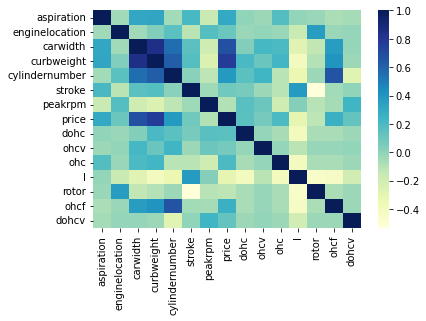

In [20]:
import seaborn as sns
corr = df.corr()
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, cmap='YlGnBu')

corr_df = corr.unstack().reset_index()
corr_df.columns = ['feature_1', 'feature_2', 'corr']
corr_df.sort_values(by='corr', ascending = False, inplace=True)
corr_df = corr_df[corr_df['feature_1'] !=corr_df['feature_2']]
corr_df.head(30)
#curbweight, we keep
#carwidth, we keep
#cylindernumber, we remove

In [21]:
df = df[["curbweight","carwidth", "price"]]

💡 Among the highly correlated pairs $(feature\;A, feature\;B)$ of features,

Keep the feature
- that is the most correlated with the target,
- and with the most "granularity" (most distinguishable, unique and detailed)

Discard the other one.

### ☑️ Test your code

In [22]:
from nbresult import ChallengeResult

result = ChallengeResult('collinearity',
                         dataset = df)
result.write()
print(result.check())

============================= test session starts ==============================
platform linux -- Python 3.8.12, pytest-6.2.5, py-1.11.0, pluggy-1.0.0 -- /home/cherif/.pyenv/versions/lewagon/bin/python3
cachedir: .pytest_cache
rootdir: /home/cherif/code/cherifbenham/data-challenges/05-ML/02-Prepare-the-dataset/03-Car-Prices
plugins: anyio-3.4.0
collecting ... collected 1 item

tests/test_collinearity.py::TestCollinearity::test_removed_highly_correlated_features PASSED [100%]

============================== 1 passed in 0.38s ===============================


💯 You can commit your code:

git add tests/collinearity.pickle

git commit -m 'Completed collinearity step'

git push origin master


# 6 - Base Modeling

👇 Cross validate a Logistic regression model. Save its score under variable name `base_model_score`.

In [23]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, df[["curbweight", "carwidth"]], df.price, cv=10) # Cross validate

base_model_score = scores.mean()


### ☑️ Test your code

In [24]:
from nbresult import ChallengeResult

result = ChallengeResult('base_model',
                         score = base_model_score
)

result.write()
print(result.check())

============================= test session starts ==============================
platform linux -- Python 3.8.12, pytest-6.2.5, py-1.11.0, pluggy-1.0.0 -- /home/cherif/.pyenv/versions/lewagon/bin/python3
cachedir: .pytest_cache
rootdir: /home/cherif/code/cherifbenham/data-challenges/05-ML/02-Prepare-the-dataset/03-Car-Prices
plugins: anyio-3.4.0
collecting ... collected 1 item

tests/test_base_model.py::TestBase_model::test_base_model_score PASSED   [100%]

============================== 1 passed in 0.16s ===============================


💯 You can commit your code:

git add tests/base_model.pickle

git commit -m 'Completed base_model step'

git push origin master


# 7 - Feature Selection

👇 Perform feature permutation to remove the weak features from the feature set. Using your new set of strong features, cross-validate a new model, and save its score under variable name `strong_model_score`.

In [25]:
from sklearn.inspection import permutation_importance
X = df[["curbweight", "carwidth"]]
y = df["price"]
log_model = LogisticRegression().fit(X, y) # Fit model

permutation_score = permutation_importance(log_model, X, y, n_repeats=10) # Perform Permutation

importance_df = pd.DataFrame(np.vstack((X.columns,
                                        permutation_score.importances_mean)).T) # Unstack results
importance_df.columns=['feature','score decrease']

importance_df.sort_values(by="score decrease", ascending = False) # Order by importance



,feature,score decrease
0,curbweight,0.291623
1,carwidth,0.071204


In [26]:
model = LogisticRegression()
scores = cross_val_score(model, df[["curbweight"]], df.price, cv=10) # Cross validate

strong_model_score = scores.mean()


### ☑️ Test your code

In [27]:
from nbresult import ChallengeResult

result = ChallengeResult('strong_model',
                         score = strong_model_score
)

result.write()
print(result.check())

============================= test session starts ==============================
platform linux -- Python 3.8.12, pytest-6.2.5, py-1.11.0, pluggy-1.0.0 -- /home/cherif/.pyenv/versions/lewagon/bin/python3
cachedir: .pytest_cache
rootdir: /home/cherif/code/cherifbenham/data-challenges/05-ML/02-Prepare-the-dataset/03-Car-Prices
plugins: anyio-3.4.0
collecting ... collected 1 item

tests/test_strong_model.py::TestStrong_model::test_strong_model_score PASSED [100%]

============================== 1 passed in 0.16s ===============================


💯 You can commit your code:

git add tests/strong_model.pickle

git commit -m 'Completed strong_model step'

git push origin master


# 🏁